In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data


In [3]:
!!pip install ISLP

['Collecting ISLP',
 '  Downloading ISLP-0.4.0-py3-none-any.whl.metadata (7.0 kB)',
 'Requirement already satisfied: numpy>=1.7.1 in /usr/local/lib/python3.12/dist-packages (from ISLP) (2.0.2)',
 'Requirement already satisfied: scipy>=0.9 in /usr/local/lib/python3.12/dist-packages (from ISLP) (1.16.3)',
 'Requirement already satisfied: pandas>=0.20 in /usr/local/lib/python3.12/dist-packages (from ISLP) (2.2.2)',
 'Requirement already satisfied: lxml in /usr/local/lib/python3.12/dist-packages (from ISLP) (6.0.2)',
 'Requirement already satisfied: scikit-learn>=1.2 in /usr/local/lib/python3.12/dist-packages (from ISLP) (1.6.1)',
 'Requirement already satisfied: joblib in /usr/local/lib/python3.12/dist-packages (from ISLP) (1.5.2)',
 'Requirement already satisfied: statsmodels>=0.13 in /usr/local/lib/python3.12/dist-packages (from ISLP) (0.14.6)',
 'Collecting lifelines (from ISLP)',
 '  Downloading lifelines-0.30.0-py3-none-any.whl.metadata (3.2 kB)',
 'Collecting pygam (from ISLP)',
 ' 

In [12]:
credit = load_data('Credit')
df = credit.copy()

X = df["Income"].values
y = df["Balance"].values

#add intercept
X_b = np.c_[np.ones((len(X), 1)), X]
print(X_b.shape) 

#normmal eq = theta  = (X transpose * X)^-1 * X transpose * Y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

intercept, slope = theta_best[0], theta_best[1]

print("Intercept", intercept)
print("Slope", slope)

print(theta_best)

#prediction
y_pred = X_b @ theta_best


(400, 2)
Intercept 246.51475059140296
Slope 6.048363408531568
[246.51475059   6.04836341]


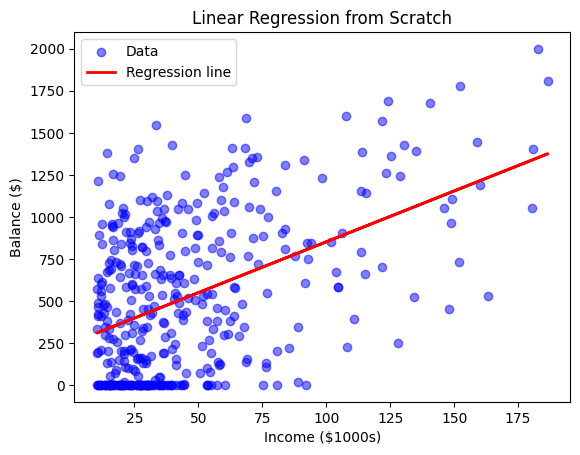

In [13]:
plt.scatter(X, y, c="blue", alpha=0.5, label="Data")
plt.plot(X, y_pred, c="red", linewidth=2, label="Regression line")
plt.xlabel("Income ($1000s)")
plt.ylabel("Balance ($)")
plt.title("Linear Regression from Scratch")
plt.legend()
plt.show()